In [4]:

# ___________                     __________                   _________.__            __    #
# \__    ___/___ _____    _____   \____    /___________  ____ /   _____/|  |__   _____/  |_  #
#   |    |_/ __ \\__  \  /     \    /     // __ \_  __ \/  _ \\_____  \ |  |  \ /  _ \   __\ #
#   |    |\  ___/ / __ \|  Y Y  \  /     /\  ___/|  | \(  <_> )        \|   Y  (  <_> )  |   #
#   |____| \___  >____  /__|_|  / /_______ \___  >__|   \____/_______  /|___|  /\____/|__|   #
#              \/     \/      \/          \/   \/                    \/      \/              #


# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import RobustScaler 
from sklearn.metrics import mean_absolute_error 
import joblib

# 2.	Data Preparation & Feature Engineering

## 2.1 Demographics Data Preprocessing


In [8]:
train_cdna = pd.read_csv("train_cdna_data.csv")

C:\Users\dhruv\AppData\Local\Temp\ipykernel_30628\588122452.py:1: DtypeWarning: Columns (7,12,13,15,16,17,18,19,29,37,45,46,47,56,58,66,69,71,74,228) have mixed types. Specify dtype option on import or set low_memory=False.
  train_cdna = pd.read_csv("train_cdna_data.csv")


In [9]:
train_cdna = train_cdna.dropna(axis=1, how='all')

In [10]:
train_cdna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1285402 entries, 0 to 1285401
Columns: 278 entries, CUSTOMER_CODE to batch_date
dtypes: bool(9), float64(156), int64(35), object(78)
memory usage: 2.6+ GB


2.1.1	 Missing Value Analysis

In [11]:
# Calculate percentage of missing values per column
missing_percentages = (train_cdna.isna().sum() / len(train_cdna)) * 100

# Identify columns to drop (more than 40% missing)
columns_to_drop = missing_percentages[missing_percentages > 40].index


# Print information about dropped columns (optional)
if not columns_to_drop.empty:
    print("Columns dropped due to >40% missing values:")
    print(columns_to_drop.tolist())
    print(f"Number of columns dropped: {len(columns_to_drop)}")
else:
    print("No columns had more than 40% missing values.")

print("\nShape of original train_cdna:", train_cdna.shape)

#Demonstration using inplace=True
train_cdna.drop(columns=columns_to_drop, inplace=True)
print("\nShape of original train_cdna after using inplace=True:", train_cdna.shape)

Columns dropped due to >40% missing values:
['v8', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v28', 'v32', 'v38', 'v42', 'v44', 'v46', 'v47', 'v48', 'v55', 'v57', 'v58', 'v59', 'v61', 'v62', 'v63', 'v64', 'v65', 'v66', 'v67', 'v68', 'v69', 'v70', 'v71', 'v72', 'v74', 'v75', 'v77', 'v79', 'v84', 'v85', 'v99', 'v103', 'v107', 'v108', 'v109', 'v110', 'v111', 'v112', 'v113', 'v114', 'v115', 'v116', 'v117', 'v118', 'v119', 'v120', 'v121', 'v122', 'v123', 'v124', 'v125', 'v126', 'v127', 'v128', 'v129', 'v130', 'v131', 'v132', 'v133', 'v134', 'v135', 'v136', 'v137', 'v138', 'v139', 'v140', 'v141', 'v142', 'v143', 'v144', 'v145', 'v146', 'v147', 'v148', 'v155', 'v156', 'v157', 'v158', 'v159', 'v160', 'v161', 'v162', 'v163', 'v164', 'v165', 'v166', 'v167', 'v168', 'v169', 'v170', 'v171', 'v172', 'v173', 'v174', 'v175', 'v176', 'v177', 'v178', 'v179', 'v180', 'v181', 'v182', 'v183', 'v184', 'v185', 'v186', 'v187', 'v188', 'v189', 'v190', 'v191', 'v192', 'v193', 'v194', 'v195

In [12]:
mis_val = train_cdna.isnull().sum()

    # Percentage of missing values
mis_val_percent = 100 * train_cdna.isnull().sum() / len(train_cdna)

    # Make a table with the results
mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
mis_val_table_ren_columns = mis_val_table.rename(
columns = {0 : 'Missing Values', 1 : '% of Total Values'})

    # Sort the table by percentage of missing descending
mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
print ("Your selected dataframe has " + str(train_cdna.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

Your selected dataframe has 106 columns.
There are 59 columns that have missing values.


2.1.2	 Feature Selection

In [13]:
columns_to_extract = ['CUSTOMER_CODE', 'v2', 'v6', 'v9','v27','v29','v36','v54','v80','v81','v100','v101','v102','batch_date']
train_demo = train_cdna[columns_to_extract]

In [14]:
total_rows = len(train_demo)
missing_percentage = (train_demo.isnull().sum() / total_rows) * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False) # Only print if there are missing values
if missing_percentage.empty:
    print("No missing values found in the DataFrame.")
else:
    print("Percentage of missing values per column (descending order):")
    for column, percentage in missing_percentage.items():
        print(f"{column}: {percentage:.2f}%")

Percentage of missing values per column (descending order):
v102: 18.49%
v29: 18.23%
v27: 4.69%
v80: 3.52%
v2: 3.52%
v54: 3.52%
v101: 2.67%
v9: 1.64%
v6: 0.30%
v81: 0.01%


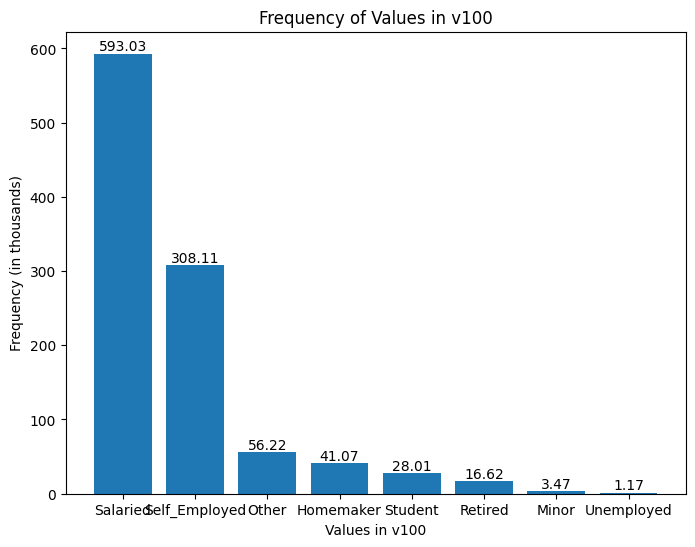

In [15]:
value_counts = train_demo['v102'].value_counts() / 1000

# Create the histogram
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.bar(value_counts.index, value_counts.values)

# Add labels and title
plt.xlabel("Values in v100")
plt.ylabel("Frequency (in thousands)")
plt.title("Frequency of Values in v100")

# Add value labels on top of the bars
for i, v in enumerate(value_counts):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')

In [16]:
train_demo.fillna(train_demo.mode().iloc[0], inplace=True)

C:\Users\dhruv\AppData\Local\Temp\ipykernel_30628\1042971726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_demo.fillna(train_demo.mode().iloc[0], inplace=True)


In [17]:
total_rows = len(train_demo)
missing_percentage = (train_demo.isnull().sum() / total_rows) * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False) # Only print if there are missing values
if missing_percentage.empty:
    print("No missing values found in the DataFrame.")
else:
    print("Percentage of missing values per column (descending order):")
    for column, percentage in missing_percentage.items():
        print(f"{column}: {percentage:.2f}%")

No missing values found in the DataFrame.


In [18]:
columns_to_drop = ['v6', 'v9','v80']
train_demo = train_demo.drop(columns=columns_to_drop)

In [19]:
for col_name in train_demo.columns[1:-1]:  # Iterate from the second to the second-to-last column
        unique_values = train_demo[col_name].unique()
        print(f"\n Unique values in column '{col_name}': {unique_values}")


 Unique values in column 'v2': ['50-54' '35-39' '20-24' '30-34' '25-29' '40-44' '60-64' '45-49' '55-59'
 '65-69' '15-19' '70-74' '75-79' '0-4' '85-89' '80-84' '10-14' '5-9'
 '90-94' '95-99' '100-104' '125-129']

 Unique values in column 'v27': ['MARRIED' 'Married' 'Unmarried' 'UNMARRIED' 'S' 'M' 'OTHER' 'Widow'
 'SINGLE' 'WIDOW' 'Single']

 Unique values in column 'v29': ['SALARIED' 'Self Employed Business' 'Salaried' 'Homemaker'
 'SELF EMPLOYED' 'Salaried-Private' 'OTHER' 'Student'
 'Selp employed profesional' 'Salarid-Public' 'Retired' 'Salarid-Govt'
 'OTHERSSTUDENT' 'Self Employed' 'Self Employed Professional-Doctor'
 'Farmer' 'CORPORATE' 'Unemployed' 'Self Employed Professional-CA'
 'NA - Minor' 'NORMAL' 'INDIVIDUAL SELF EMPLOYED' 'INDIVIDUAL SALARIED'
 'SALARIEDPRIVATESECTOR' 'OTHERSNOTCATEGORIZED'
 'Self employed professional' 'STUDENT' 'Non earning individuals'
 'Self Employed Professional-Consultant'
 'Self Employed Professional-Architect' 'Professional'
 'Self Employed Profes

Cleaning v54

In [20]:
# Calculate percentage counts
percent_counts = train_demo['v54'].value_counts(normalize=True) * 100

# Print the percentages
print(percent_counts)

v54
Male            39.725860
MALE            33.549816
Female          10.636672
M                9.318097
FEMALE           5.733693
F                1.016491
C                0.009336
THIRD GENDER     0.005913
OTHERS           0.002256
U                0.001400
O                0.000467
Name: proportion, dtype: float64


In [21]:
# Convert all values to lowercase
train_demo['v54'] = train_demo['v54'].str.lower()

# Replace values starting with "salary" with "salaried"
train_demo['v54'] = train_demo['v54'].replace(r'^m.*', 'male', regex=True)

# Replace values starting with "sel.." with "self employed"
train_demo['v54'] = train_demo['v54'].replace(r'^f.*', 'female', regex=True)

# Merge values with the same names (already handled by string operations)
# Optional: Re-calculate value counts to verify
pct_count = train_demo['v54'].value_counts(normalize=True)*100

# Print the updated value counts
print(pct_count)

v54
male            82.593772
female          17.386856
c                0.009336
third gender     0.005913
others           0.002256
u                0.001400
o                0.000467
Name: proportion, dtype: float64


In [22]:
keep_values = ['male', 'female']

# Replace all other values with 'other'
train_demo['v54'] = train_demo['v54'].apply(lambda x: x if x in keep_values else 'other')

# Verify the changes by checking the updated value counts
pct_counts = train_demo['v54'].value_counts(normalize=True)*100
print(pct_counts)

v54
male      82.593772
female    17.386856
other      0.019371
Name: proportion, dtype: float64


Cleaning v27

In [23]:
# Calculate percentage counts
percent_counts = train_demo['v27'].value_counts(normalize=True) * 100

# Print the percentages
print(percent_counts)

v27
Unmarried    36.515892
MARRIED      28.792627
Married      15.018803
UNMARRIED    11.365316
M             7.247538
S             1.057568
OTHER         0.000934
SINGLE        0.000622
Single        0.000389
WIDOW         0.000233
Widow         0.000078
Name: proportion, dtype: float64


In [24]:
# Convert all values to lowercase
train_demo['v27'] = train_demo['v27'].str.lower()

# Replace values starting with "salary" with "salaried"
train_demo['v27'] = train_demo['v27'].replace(r'^m.*', 'married', regex=True)

# Replace values starting with "sel.." with "self employed"
train_demo['v27'] = train_demo['v27'].replace(r'^s.*', 'single', regex=True)

# Merge values with the same names (already handled by string operations)
# Optional: Re-calculate value counts to verify
pct_count = train_demo['v27'].value_counts(normalize=True)*100

# Print the updated value counts
print(pct_count)

v27
married      51.058968
unmarried    47.881208
single        1.058579
other         0.000934
widow         0.000311
Name: proportion, dtype: float64


Cleaning v29

In [25]:
# Convert all values to lowercase
train_demo['v29'] = train_demo['v29'].str.lower()

# Replace values starting with "salary" with "salaried"
train_demo['v29'] = train_demo['v29'].replace(r'^sala.*', 'salaried', regex=True)

# Replace values starting with "sel.." with "self employed"
train_demo['v29'] = train_demo['v29'].replace(r'^sel.*', 'self employed', regex=True)

# Merge values with the same names (already handled by string operations)
# Optional: Re-calculate value counts to verify
pct_count = train_demo['v29'].value_counts(normalize=True)*100

# Print the updated value counts
print(pct_count)

v29
salaried                                 64.340494
self employed                            23.975223
homemaker                                 3.183518
other                                     2.834522
student                                   2.179240
retired                                   1.293136
farmer                                    0.934960
professional                              0.294694
na - minor                                0.269954
normal                                    0.197526
individual salaried                       0.165551
unemployed                                0.090789
corporate                                 0.057414
individual self employed                  0.056325
retd. pensioner                           0.030107
house wife                                0.011825
pensioner                                 0.010269
others                                    0.010191
group company employee                    0.008480
non-individual             

In [26]:
keep_values = ['salaried', 'unemployed','self employed','homemaker','student','retired']

# Replace all other values with 'other'
train_demo['v29'] = train_demo['v29'].apply(lambda x: x if x in keep_values else 'other')

# Verify the changes by checking the updated value counts
pct_counts = train_demo['v29'].value_counts(normalize=True)*100
print(pct_counts)

v29
salaried         64.340494
self employed    23.975223
other             4.937599
homemaker         3.183518
student           2.179240
retired           1.293136
unemployed        0.090789
Name: proportion, dtype: float64


Final Check

In [27]:
for col_name in train_demo.columns[1:-1]:  # Iterate from the second to the second-to-last column
        unique_values = train_demo[col_name].unique()
        print(f"\n Unique values in column '{col_name}': {unique_values}")


 Unique values in column 'v2': ['50-54' '35-39' '20-24' '30-34' '25-29' '40-44' '60-64' '45-49' '55-59'
 '65-69' '15-19' '70-74' '75-79' '0-4' '85-89' '80-84' '10-14' '5-9'
 '90-94' '95-99' '100-104' '125-129']

 Unique values in column 'v27': ['married' 'unmarried' 'single' 'other' 'widow']

 Unique values in column 'v29': ['salaried' 'self employed' 'homemaker' 'other' 'student' 'retired'
 'unemployed']

 Unique values in column 'v36': ['MDM' 'MDM_CORP' 'FINNONE' 'CUSTOMER']

 Unique values in column 'v54': ['male' 'female' 'other']

 Unique values in column 'v81': ['N' 'Y']

 Unique values in column 'v100': [1 3 2 4]

 Unique values in column 'v101': ['Tier 1' 'Tier 5' 'Tier 6' 'Tier 2' 'Tier 7' 'Tier 8' 'Tier 3' 'Tier 4'
 'Rural']

 Unique values in column 'v102': ['Salaried' 'Self_Employed' 'Homemaker' 'Other' 'Student' 'Retired'
 'Unemployed' 'Minor']


2.1.3   One Hot Encoding

In [28]:
train_demo_encoded = pd.get_dummies(train_demo, columns=['v2', 'v27','v29', 'v36', 'v54', 'v81', 'v100', 'v101', 'v102'], prefix_sep='_')

In [29]:
train_demo_encoded.head()

,CUSTOMER_CODE,batch_date,v2_0-4,v2_10-14,v2_100-104,v2_125-129,v2_15-19,v2_20-24,v2_25-29,v2_30-34,...,v101_Tier 7,v101_Tier 8,v102_Homemaker,v102_Minor,v102_Other,v102_Retired,v102_Salaried,v102_Self_Employed,v102_Student,v102_Unemployed
0,ab617a6a0a8582f4aaa1aeda38fd73377cb911e6096a98...,2024-09-27,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,6e8e3227297409f3f33578400302825263cadc2ed0d1a0...,2024-09-27,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,1b42f270aba756b64d7ae4e2409313097b0c91f7c2f2c7...,2024-09-27,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,06a4aae9b531a518260c7d0d88811cc202fd0d3e46d9ea...,2024-09-27,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
4,0e4fa92b7a41dc019c9f40457e180e94ca60d0b5c7128e...,2024-09-27,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False


In [30]:
train_demo_encoded = train_demo_encoded * 1

In [31]:
train_demo_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1285402 entries, 0 to 1285401
Data columns (total 66 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   CUSTOMER_CODE       1285402 non-null  object
 1   batch_date          1285402 non-null  object
 2   v2_0-4              1285402 non-null  int64 
 3   v2_10-14            1285402 non-null  int64 
 4   v2_100-104          1285402 non-null  int64 
 5   v2_125-129          1285402 non-null  int64 
 6   v2_15-19            1285402 non-null  int64 
 7   v2_20-24            1285402 non-null  int64 
 8   v2_25-29            1285402 non-null  int64 
 9   v2_30-34            1285402 non-null  int64 
 10  v2_35-39            1285402 non-null  int64 
 11  v2_40-44            1285402 non-null  int64 
 12  v2_45-49            1285402 non-null  int64 
 13  v2_5-9              1285402 non-null  int64 
 14  v2_50-54            1285402 non-null  int64 
 15  v2_55-59            1285402 non-

## 2.2 Action History Data Preprocessing

In [ ]:
train_action_history = pd.read_csv('train_action_history.csv')

2.2.1	 Slot Creation


In [ ]:
def add_time_slots_vectorized(df):
    """
    Converts send_timestamp and open_timestamp to time slots (1-28) in a vectorized way.
    - Time slots: 3-hour windows from 9AM to 9PM daily (4 slots/day × 7 days = 28 slots).
    - Slots outside 9AM-9PM are set to `None`.
    """
    for col in ['send_timestamp', 'open_timestamp']:
        if col not in df.columns:
            continue
        
        dt_series = pd.to_datetime(df[col], errors='coerce', utc=True)
        day_of_week = dt_series.dt.dayofweek  
        total_minutes = dt_series.dt.hour * 60 + dt_series.dt.minute
        valid_mask = (total_minutes >= 540) & (total_minutes < 1260)  
        slot_in_day = ((total_minutes - 540) // 180).astype('Int64')  
        slot_number = (day_of_week * 4 + slot_in_day + 1).where(valid_mask, pd.NA) 
        
        df[f'{col}_slot'] = slot_number.astype('Int64')  
    
    return df

2.2.2	Offer ID and Sub-ID Frequency Encoding


In [ ]:
def encode_open_ratio_with_slot(df, feature_name, slot_column='send_slot'):
    """
    Encodes a feature (e.g., Offer_id) with: (open_ratio) × (slot_number).
    
    Parameters:
    - df: DataFrame containing the data.
    - feature_name: Name of the feature to encode (e.g., 'Offer_id').
    - slot_column: Name of the column containing slot numbers (e.g., 'send_slot').
    
    Returns:
    - Series with encoded values.
    """
    df['is_opened'] = df['open_timestamp_slot'].notna().astype(int)
    open_ratio = df.groupby(feature_name)['is_opened'].transform('mean')
    encoded_value = open_ratio * df[slot_column]
    df.drop('is_opened', axis=1, inplace=True)
    
    return encoded_value



In [ ]:
df_train_slots = add_time_slots_vectorized(train_action_history)
df_train_slots.drop(columns=['batch_id'], inplace=True)
df_train_slots.head()

In [ ]:
Offer_id = encode_open_ratio_with_slot(df_train_slots, 'Offer_id', 'send_timestamp_slot')
Offer_subid = encode_open_ratio_with_slot(df_train_slots, 'Offer_subid', 'send_timestamp_slot')
df_train_slots['Offer_id'] = Offer_id
df_train_slots['Offer_subid'] = Offer_subid

In [ ]:
df_train_removed = df_train_slots[df_train_slots['customer_code'].isin(train_demo_encoded['CUSTOMER_CODE'])]
df_train_removed['send_timestamp_slot'].hist(bins=50)
value_counts = df_train_removed['send_timestamp_slot'].value_counts(normalize=True) * 100
print(value_counts)

2.2.3  Sampling Methadology

In [33]:
df = df_train_removed

# 1. Calculate the original sent counts for each class
class_sent_counts = df['send_timestamp_slot'].value_counts().to_dict()

# 2. Identify opened entries (drop NaN in 'open_timestamp_slot')
df_opened = df.dropna(subset=['open_timestamp_slot']).copy()

# 3. For each class, calculate how many opened entries to retain to preserve the original ratio
final_samples = []
for cls, sent_count in class_sent_counts.items():
    # Get opened entries for this class
    cls_opened = df_opened[df_opened['send_timestamp_slot'] == cls]
    opened_count = len(cls_opened)
    
    # Calculate the original opened ratio for this class
    original_opened_ratio = opened_count / sent_count  # e.g., 0.3 for 30% opened
    
    # Retain the same ratio of opened entries relative to the original sent count
    # Example: If original ratio is 30%, retain 30% of the original sent count
    desired_retained = int(sent_count * original_opened_ratio)
    
    # If fewer opened entries exist than desired, take all available
    desired_retained = min(desired_retained, opened_count)
    
    # Sample without replacement
    sampled = cls_opened.sample(n=desired_retained, replace=False, random_state=42)
    final_samples.append(sampled)

# Combine results into the final DataFrame
final_df = pd.concat(final_samples)

# Verify the ratios
for cls in class_sent_counts:
    sent = class_sent_counts[cls]
    opened = len(final_df[final_df['send_timestamp_slot'] == cls])
    print(f"Class {cls}: Opened/Sent = {opened}/{sent} = {opened/sent:.2f}")



Class 18: Opened/Sent = 120832/469343 = 0.26
Class 10: Opened/Sent = 114784/458283 = 0.25
Class 14: Opened/Sent = 114298/440710 = 0.26
Class 23: Opened/Sent = 100699/433764 = 0.23
Class 19: Opened/Sent = 99646/432173 = 0.23
Class 11: Opened/Sent = 98334/422314 = 0.23
Class 21: Opened/Sent = 95481/403548 = 0.24
Class 22: Opened/Sent = 95725/384060 = 0.25
Class 13: Opened/Sent = 91574/378495 = 0.24
Class 15: Opened/Sent = 81718/375423 = 0.22
Class 2: Opened/Sent = 93506/355321 = 0.26
Class 6: Opened/Sent = 89822/351989 = 0.26
Class 26: Opened/Sent = 88525/349715 = 0.25
Class 3: Opened/Sent = 83523/348825 = 0.24
Class 5: Opened/Sent = 86946/346244 = 0.25
Class 17: Opened/Sent = 86589/345755 = 0.25
Class 7: Opened/Sent = 78849/339061 = 0.23
Class 27: Opened/Sent = 74007/320349 = 0.23
Class 1: Opened/Sent = 70455/290874 = 0.24
Class 25: Opened/Sent = 66097/284834 = 0.23
Class 9: Opened/Sent = 58511/234591 = 0.25
Class 16: Opened/Sent = 22088/136978 = 0.16
Class 24: Opened/Sent = 18581/99605

In [34]:
df_train_removed_sampled = final_df

2.2.4	 One hot encoding of Product category and sub category

In [35]:
# One-hot encode product_category and sub_category
df_train_removed_sampled = pd.get_dummies(df_train_removed_sampled, columns=['product_category'], prefix_sep='_')
df_train_removed_sampled = pd.get_dummies(df_train_removed_sampled, columns=['product_sub_category'], prefix_sep='_')

df_train_removed_sampled = df_train_removed_sampled * 1

df_train_removed_sampled_encoded = df_train_removed_sampled

In [36]:
df_train_removed_sampled_encoded.head()

,customer_code,Offer_id,Offer_subid,send_timestamp,open_timestamp,send_timestamp_slot,open_timestamp_slot,product_category_ASSETS,product_category_CC_ACQ_SECURED,product_category_CC_ACQ_UNSECURED,...,product_sub_category_SWYP_ACQ,product_sub_category_SWYP_UPGRADE,product_sub_category_TACTICAL,product_sub_category_TOPICAL,product_sub_category_TURBO-SA XSELL,product_sub_category_UNSECURED_ACQ,product_sub_category_UPI,product_sub_category_VISTARA_ACQ,product_sub_category_VISTARA_UPGRADE,product_sub_category_VKYC COMPLETION
1580950,10a735a2f24dab28d8d4b630b518c35d7e0e5209661203...,4.183784,4.32899,2024-11-08T13:21:26.000Z,2024-11-08T14:34:20.000Z,18,18,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7408299,fdea22ee97dc048ae6957aaa84cde1efd65d5331ff6a1b...,4.898467,5.022439,2024-08-30T12:06:39.000Z,2024-08-30T16:00:54.000Z,18,19,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7569560,65c6ef44ffb0a527c5023f8579e5bde63cc912c21e8f3a...,2.718348,2.6195,2024-11-29T12:01:20.000Z,2024-11-29T18:04:50.000Z,18,20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5466385,775f6565a6a9597985bc2175fe5607006542e04c2b2f04...,4.541515,4.541515,2024-07-26T13:36:01.000Z,2024-07-26T19:14:00.000Z,18,20,0,0,0,...,0,0,0,1,0,0,0,0,0,0
286322,bb49f6a18962c9eaba6cb95a412443de110d417a1e1135...,5.522585,5.458156,2024-09-13T13:17:05.000Z,2024-09-13T13:19:24.000Z,18,18,0,0,0,...,0,0,0,0,1,0,0,0,0,0


2.2.5 Merging data

In [38]:
demograph = train_demo_encoded
action = df_train_removed_sampled_encoded

# Convert date columns to datetime objects
action['send_timestamp'] = pd.to_datetime(action['send_timestamp'])
demograph['batch_date'] = pd.to_datetime(demograph['batch_date'])

# Assuming IST timezone for both DataFrames
action['send_timestamp'] = action['send_timestamp'].dt.tz_convert('Asia/Calcutta') if action['send_timestamp'].dt.tz is not None else action['send_timestamp'].dt.tz_localize('Asia/Calcutta')
demograph['batch_date'] = demograph['batch_date'].dt.tz_convert('Asia/Calcutta') if demograph['batch_date'].dt.tz is not None else demograph['batch_date'].dt.tz_localize('Asia/Calcutta')

# Sort both DataFrames by the key columns
action = action.sort_values(by=['customer_code', 'send_timestamp'])
demograph = demograph.sort_values(by=['CUSTOMER_CODE', 'batch_date'])

# Ensure both left and right keys are sorted
action = action.sort_values(by='send_timestamp')
demograph = demograph.sort_values(by='batch_date')

# Perform the merge using merge_asof
merged_data = pd.merge_asof(
    action,
    demograph,
    left_on='send_timestamp',
    right_on='batch_date',
    left_by='customer_code',
    right_by='CUSTOMER_CODE',
    direction='backward'
)


2.2.6  One hot encoding of Send_slots


In [40]:
df = merged_data
df = pd.get_dummies(df, columns=['send_timestamp_slot'], prefix_sep='_',dtype=int)
df.drop(columns=['open_timestamp','open_timestamp_slot','CUSTOMER_CODE','batch_date'], inplace=True)

In [43]:
# Remove rows containing NaN values
df = df.dropna()

# Print the number of NaN values in the cleaned dataframe
print("Number of NaN values in the cleaned dataframe:", df.isnull().sum().sum())


Number of NaN values in the cleaned dataframe: 0


# 3. Model Development

3.1 Training Set Creation


In [44]:
# Convert send_timestamp to datetime and sort
df['send_timestamp'] = pd.to_datetime(df['send_timestamp'])
df = df.sort_values(by='send_timestamp')

# Get the minimum timestamp in the data
min_timestamp = df['send_timestamp'].min()
max_timestamp = df['send_timestamp'].max()  # For validation

# Define overlapping 3-month windows (starting 1 month apart)
# -----------------------------------------------------------

# X_1: First 3 months (e.g., 2024-06-01 to 2024-09-01)
X_1 = df[
    (df['send_timestamp'] >= min_timestamp) & 
    (df['send_timestamp'] < min_timestamp + pd.DateOffset(months=3))
]

# X_2: Starts 1 month after X_1 (e.g., 2024-07-01 to 2024-10-01)
X_2 = df[
    (df['send_timestamp'] >= min_timestamp + pd.DateOffset(months=1)) & 
    (df['send_timestamp'] < min_timestamp + pd.DateOffset(months=4))
]

# X_3: Starts 2 months after X_1 (e.g., 2024-08-01 to 2024-11-01)
X_3 = df[
    (df['send_timestamp'] >= min_timestamp + pd.DateOffset(months=2)) & 
    (df['send_timestamp'] < min_timestamp + pd.DateOffset(months=5))
]

# Print results
print("X_1 Date Range:", X_1['send_timestamp'].min(), "to", X_1['send_timestamp'].max())
print("X_2 Date Range:", X_2['send_timestamp'].min(), "to", X_2['send_timestamp'].max())
print("X_3 Date Range:", X_3['send_timestamp'].min(), "to", X_3['send_timestamp'].max())
print("\nShape of X_1:", X_1.shape)
print("Shape of X_2:", X_2.shape)
print("Shape of X_3:", X_3.shape)

X_1 Date Range: 2024-06-01 15:02:41+05:30 to 2024-09-01 15:02:24+05:30
X_2 Date Range: 2024-07-01 15:06:41+05:30 to 2024-10-01 15:02:39+05:30
X_3 Date Range: 2024-08-01 15:03:26+05:30 to 2024-11-01 15:02:36+05:30

Shape of X_1: (984271, 200)
Shape of X_2: (1057767, 200)
Shape of X_3: (1113456, 200)


3.2 Target Variable Creation

In [45]:
# Convert send_timestamp to datetime and sort
df['send_timestamp'] = pd.to_datetime(df['send_timestamp'])
df = df.sort_values(by='send_timestamp')

# Define key timestamps
min_timestamp = df['send_timestamp'].min()  # 2024-06-01 15:02:41+05:30
max_timestamp = df['send_timestamp'].max()  # 2024-12-01 01:30:18+05:30

# --------------------------------------------------------
y_start = pd.Timestamp('2024-09-01').tz_localize('Asia/Kolkata')  # Define start date

Y_1 = df[
    (df['send_timestamp'] >= y_start) &
    (df['send_timestamp'] < y_start + pd.DateOffset(months=1))  # Sep 1 - Oct 1
]

Y_2 = df[
    (df['send_timestamp'] >= y_start + pd.DateOffset(months=1)) &
    (df['send_timestamp'] < y_start + pd.DateOffset(months=2))  # Oct 1 - Nov 1
]

Y_3 = df[
    (df['send_timestamp'] >= y_start + pd.DateOffset(months=2)) &
    (df['send_timestamp'] < y_start + pd.DateOffset(months=3))  # Nov 1 - Dec 1
]


print("\nTest Windows:")
print("Y_1:", Y_1['send_timestamp'].min(), "to", Y_1['send_timestamp'].max(), "| Shape:", Y_1.shape)
print("Y_2:", Y_2['send_timestamp'].min(), "to", Y_2['send_timestamp'].max(), "| Shape:", Y_2.shape)
print("Y_3:", Y_3['send_timestamp'].min(), "to", Y_3['send_timestamp'].max(), "| Shape:", Y_3.shape)


Test Windows:
Y_1: 2024-09-01 00:00:23+05:30 to 2024-09-30 23:59:24+05:30 | Shape: (363805, 200)
Y_2: 2024-10-01 00:00:06+05:30 to 2024-10-31 23:59:30+05:30 | Shape: (398791, 200)
Y_3: 2024-11-01 00:00:08+05:30 to 2024-11-30 23:59:59+05:30 | Shape: (268244, 200)


3.2.1 Preprocessing X and Y

In [47]:
# Drop the 'send_timestamp' column and select only numeric columns
X_1.drop(columns=['send_timestamp'],inplace=True)
X_1_merged = X_1.groupby('customer_code').mean().reset_index()

X_2.drop(columns=['send_timestamp'],inplace=True)
X_2_merged = X_2.groupby('customer_code').mean().reset_index()

X_3.drop(columns=['send_timestamp'],inplace=True)
X_3_merged = X_3.groupby('customer_code').mean().reset_index()

In [48]:
X_1_merged.shape

(137915, 199)

In [49]:
# Filter columns for Y_1
columns_to_keep = ['customer_code'] + [col for col in Y_1.columns if col.startswith('send_timestamp_slot_')]
Y_1 = Y_1[columns_to_keep]

# Filter columns for Y_2
columns_to_keep = ['customer_code'] + [col for col in Y_2.columns if col.startswith('send_timestamp_slot_')]
Y_2 = Y_2[columns_to_keep]

# Filter columns for Y_3
columns_to_keep = ['customer_code'] + [col for col in Y_3.columns if col.startswith('send_timestamp_slot_')]
Y_3 = Y_3[columns_to_keep]


In [50]:
Y_1_merged = Y_1.groupby('customer_code').mean().reset_index()
Y_2_merged = Y_2.groupby('customer_code').mean().reset_index()
Y_3_merged = Y_3.groupby('customer_code').mean().reset_index()

In [51]:
def align_and_filter_datasets(X_df, Y_df, customer_col='customer_code', verbose=True, keep_order=True):
    """
    Aligns and filters two datasets to keep only common customers, optionally reordering Y to match X's sequence.
    
    Parameters:
    X_df (DataFrame): First dataset with customer codes
    Y_df (DataFrame): Second dataset with customer codes
    customer_col (str): Name of customer code column (default: 'customer_code')
    verbose (bool): Whether to print progress messages (default: True)
    keep_order (bool): Whether to maintain X's customer order in Y (default: True)
    
    Returns:
    tuple: (X_filtered, Y_filtered) - Aligned and filtered DataFrames
    """
    # Validate inputs
    if customer_col not in X_df.columns:
        raise ValueError(f"Column '{customer_col}' not found in X dataframe")
    if customer_col not in Y_df.columns:
        raise ValueError(f"Column '{customer_col}' not found in Y dataframe")

    # Find common customers
    common_mask = X_df[customer_col].isin(Y_df[customer_col])
    common_customers = X_df.loc[common_mask, customer_col].unique()
    
    if verbose:
        original_X = len(X_df)
        original_Y = len(Y_df)
        print(f"Original sizes: X={original_X}, Y={original_Y}")
        print(f"Found {len(common_customers)} common customers")

    # Filter both datasets
    X_filtered = X_df[X_df[customer_col].isin(common_customers)]
    Y_filtered = Y_df[Y_df[customer_col].isin(common_customers)]

    if keep_order:
        # Create ordering reference from X
        order_df = pd.DataFrame({
            customer_col: X_filtered[customer_col],
            '__sort_key__': range(len(X_filtered))
        })

        # Merge with Y to inherit order
        Y_filtered = (
            order_df
            .merge(Y_filtered, on=customer_col, how='left')
            .sort_values('__sort_key__')
            .drop(columns='__sort_key__')
            .reset_index(drop=True)
        )

    if verbose:
        print(f"Final sizes: X={len(X_filtered)}, Y={len(Y_filtered)}")
        print(f"Missing in Y after alignment: {Y_filtered[customer_col].isna().sum()}")

    return X_filtered, Y_filtered

In [52]:
X_1_final, Y_1_final = align_and_filter_datasets(X_1_merged, Y_1_merged)
X_2_final, Y_2_final = align_and_filter_datasets(X_2_merged, Y_2_merged)
X_3_final, Y_3_final = align_and_filter_datasets(X_3_merged, Y_3_merged)

Original sizes: X=137915, Y=125584
Found 101513 common customers
Final sizes: X=101513, Y=101513
Missing in Y after alignment: 0
Original sizes: X=155969, Y=121330
Found 94881 common customers
Final sizes: X=94881, Y=94881
Missing in Y after alignment: 0
Original sizes: X=177855, Y=93269
Found 77776 common customers
Final sizes: X=77776, Y=77776
Missing in Y after alignment: 0


In [53]:
X_1_final.drop(columns=['customer_code'], inplace=True)
X_2_final.drop(columns=['customer_code'], inplace=True)
X_3_final.drop(columns=['customer_code'], inplace=True)

C:\Users\dhruv\AppData\Local\Temp\ipykernel_30628\1821789859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_1_final.drop(columns=['customer_code'], inplace=True)
C:\Users\dhruv\AppData\Local\Temp\ipykernel_30628\1821789859.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_2_final.drop(columns=['customer_code'], inplace=True)
C:\Users\dhruv\AppData\Local\Temp\ipykernel_30628\1821789859.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [54]:
Y_1_final.drop(columns=['customer_code'], inplace=True)
Y_2_final.drop(columns=['customer_code'], inplace=True)
Y_3_final.drop(columns=['customer_code'], inplace=True)

In [55]:
X_final = pd.concat([X_1_final, X_2_final, X_3_final], axis=0)
Y_final = pd.concat([Y_1_final, Y_2_final, Y_3_final], axis=0)

In [56]:
X_final.shape, Y_final.shape

((274170, 198), (274170, 28))

Spiliting data set

In [57]:
#Spiliting data set into train and test using strtify= y as the data set is highly imbalanced

X_train,X_test,y_train,y_test = train_test_split(X_final,Y_final, train_size = 0.8, random_state = 100) 

In [58]:
# Create the RobustScaler
robust_scaler = RobustScaler()

# Scale the training data
X_train_scaled = robust_scaler.fit_transform(X_train)
X_test_scaled = robust_scaler.transform(X_test)

3.3 Model Selection

3.3.1  Stacking Model BM : "RandomForest" and MM : "XGBoost"

In [61]:
# Define the base model (RandomForestRegressor)
base_model = RandomForestRegressor(random_state=1055, n_jobs=-1)

# Define the meta-model (XGBRegressor)
meta_model = XGBRegressor(random_state=1055, n_jobs=-1)

# Train the base model
base_model.fit(X_train_scaled, y_train)

# Generate base model predictions on the training set
base_predictions_train = base_model.predict(X_train_scaled)

# Combine the original features with the base model predictions
stacked_features_train = np.hstack((X_train_scaled, base_predictions_train))

# Train the meta-model on the stacked features
meta_model.fit(stacked_features_train, y_train)

# Generate base model predictions on the test set
base_predictions_test = base_model.predict(X_test_scaled)

# Combine the original features with the base model predictions for the test set
stacked_features_test = np.hstack((X_test_scaled, base_predictions_test))

# Make predictions using the meta-model
y_pred = meta_model.predict(stacked_features_test)

# Evaluate the model using Mean Absolute Error (or your custom MAP scorer)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

In [62]:
def calculate_map(ranked_slots, actual_relevance, k=28):
    """
    Calculate Mean Average Precision (MAP) for a single prediction.

    Parameters:
    ranked_slots (list): Ranked list of slots (e.g., ['slot_11', 'slot_23', ...]).
    actual_relevance (array): Binary array indicating relevant slots (e.g., [0, 0, 1, ...]).
    k (int): Number of slots to consider (default: 28).

    Returns:
    float: MAP score.
    """
    # Convert ranked_slots to indices (e.g., ['slot_11', 'slot_23'] -> [10, 22])
    ranked_indices = [int(slot.split('_')[1]) - 1 for slot in ranked_slots]

    # Initialize variables
    relevant_count = 0
    cumulative_precision = 0.0

    # Iterate through the ranked slots
    for i, slot_index in enumerate(ranked_indices[:k]):
        if actual_relevance[slot_index] == 1:
            relevant_count += 1
            precision_at_i = relevant_count / (i + 1)
            cumulative_precision += precision_at_i

    # Calculate Average Precision (AP)
    total_relevant = np.sum(actual_relevance)
    if total_relevant == 0:
        return 0.0  # No relevant slots, AP is 0
    ap = cumulative_precision / total_relevant

    return ap

In [63]:
# # Load the base model
# base_model = joblib.load('base_model.pkl')

# # Load the meta model
# meta_model = joblib.load('meta_model.pkl')

In [ ]:
# Updated MAP calculation for continuous values
def calculate_map_continuous(y_true, y_pred, k=28):
    """
    Calculate Mean Average Precision (MAP) for continuous predictions.

    Parameters:
    y_true (numpy array): Actual target values.
    y_pred (numpy array): Predicted probabilities or scores.
    k (int): Number of top slots to consider (default: 28).

    Returns:
    float: MAP score.
    """
    ap_scores = []
    for i in range(y_true.shape[0]):
        # Sort indices by predicted values in descending order
        sorted_indices = np.argsort(-y_pred[i])
        
        # Get top-k indices
        top_k_indices = sorted_indices[:k]
        
        # Calculate precision at k for relevant slots
        relevance = y_true[i][top_k_indices]
        precision_at_k = relevance.cumsum() / np.arange(1, k + 1)
        ap = (precision_at_k * relevance).sum() / relevance.sum() if relevance.sum() > 0 else 0
        ap_scores.append(ap)
    
    return np.mean(ap_scores)

# Generate ranked lists
def rank_slots(predictions):
    slot_names = [f"slot_{i+1}" for i in range(predictions.shape[1])]
    ranked = []
    for row in predictions:
        # Pair slot names with probabilities and sort descendingly
        sorted_slots = sorted(zip(slot_names, row), key=lambda x: -x[1])
        # Extract slot names in order
        ranked.append([slot for slot, _ in sorted_slots])
    return ranked

# Predict time slots
def predict_time_slots(base_model, meta_model, input_data):
    """
    Predicts the ranked time slots for a single input row using a stacking model.

    Parameters:
    base_model (sklearn model): Trained base regression model.
    meta_model (sklearn model): Trained meta regression model.
    input_data (array-like): Single row of input data (features).

    Returns:
    dict: Predicted probabilities and ranked slots.
    """
    # Ensure input_data is a 2D array for prediction
    input_array = np.array(input_data).reshape(1, -1)

    # Step 1: Get base model prediction for the input row
    base_prediction = base_model.predict(input_array).reshape(1, -1)

    # Step 2: Combine original input with base prediction for meta-model
    stacked_input = np.hstack((input_array, base_prediction))

    # Step 3: Predict probabilities using the meta-model
    predicted_probs = meta_model.predict(stacked_input).reshape(1, -1)

    # Step 4: Rank slots by predicted probabilities
    slot_names = [f"slot_{i+1}" for i in range(predicted_probs.shape[1])]
    sorted_slots = sorted(zip(slot_names, predicted_probs[0]), key=lambda x: -x[1])

    # Extract ranked slots and probabilities
    ranked_slots = [slot for slot, _ in sorted_slots]
    ranked_probs = [prob for _, prob in sorted_slots]

    return {
        "ranked_slots": ranked_slots,
        "ranked_probs": ranked_probs
    }
    
    # Predict time slots
def predict_time_slots(base_model, meta_model, input_data):
    """
    Predicts the ranked time slots for a single input row using a stacking model.

    Parameters:
    base_model (sklearn model): Trained base regression model.
    meta_model (sklearn model): Trained meta regression model.
    input_data (array-like): Single row of input data (features).

    Returns:
    dict: Predicted probabilities and ranked slots.
    """
    # Ensure input_data is a 2D array for prediction
    input_array = np.array(input_data).reshape(1, -1)

    # Step 1: Get base model prediction for the input row
    base_prediction = base_model.predict(input_array).reshape(1, -1)

    # Step 2: Combine original input with base prediction for meta-model
    stacked_input = np.hstack((input_array, base_prediction))

    # Step 3: Predict probabilities using the meta-model
    predicted_probs = meta_model.predict(stacked_input).reshape(1, -1)

    # Step 4: Rank slots by predicted probabilities
    slot_names = [f"slot_{i+1}" for i in range(predicted_probs.shape[1])]
    sorted_slots = sorted(zip(slot_names, predicted_probs[0]), key=lambda x: -x[1])

    # Extract ranked slots and probabilities
    ranked_slots = [slot for slot, _ in sorted_slots]
    ranked_probs = [prob for _, prob in sorted_slots]

    return {
        "ranked_slots": ranked_slots,
        "ranked_probs": ranked_probs
    }
    

In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
map_score = calculate_map_continuous(y_test.values, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² (R-squared): {r2:.4f}")
print(f"Mean Average Precision (MAP): {map_score:.4f}")

ranked_predictions = rank_slots(y_pred)

3.3.2 Artificial Neural Network

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

def mean_average_precision(y_true, y_pred):
    aps = []
    for i in range(len(y_true)):
        try:
            # Convert to NumPy arrays if necessary
            y_true_sample = np.array(y_true[i]) if isinstance(y_true, pd.Series) else y_true[i]
            y_pred_sample = np.array(y_pred[i]) if isinstance(y_pred, pd.Series) else y_pred[i]

            # Get true labels (indices of relevant items)
            true_labels = np.where(y_true_sample == 1)[0]
            pred_probs = y_pred_sample

            # Sort predictions by probability
            sorted_indices = np.argsort(pred_probs)[::-1]
            sorted_true = y_true_sample[sorted_indices]

            # Compute precision at each position
            precision = np.cumsum(sorted_true) / (np.arange(len(sorted_true)) + 1)
            average_precision = np.sum(precision * sorted_true) / np.sum(sorted_true)
            aps.append(average_precision)
        except Exception as e:
            print(f"Error in sample {i}: {e}")
            aps.append(0)  # Default to zero MAP for problematic samples
    return np.mean(aps)





In [ ]:
import numpy as np
from sklearn.metrics import average_precision_score

def map_score(y_true, y_pred):
    """
    Calculate Mean Average Precision (MAP) for multi-output regression.

    Parameters:
    y_true (array-like): Ground truth (actual relevance).
    y_pred (array-like): Predicted probabilities.

    Returns:
    float: MAP score.
    """
    n_outputs = y_true.shape[1]
    map_scores = []

    for i in range(n_outputs):
        # Rank predictions for the current target
        ranked_indices = np.argsort(-y_pred[:, i])  # Sort in descending order
        ranked_relevance = y_true[:, i][ranked_indices]

        # Calculate average precision for the current target
        ap = average_precision_score(ranked_relevance, y_pred[:, i])
        map_scores.append(ap)

    # Return the mean of average precisions
    return np.mean(map_scores)

In [ ]:
# Define the neural network model
def build_model(input_shape, output_shape):
    inputs = Input(shape=(input_shape,))
    x = Dense(128, activation='relu')(inputs)
    x = Dropout(0.2)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(32, activation='relu')(x)
    outputs = Dense(output_shape, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['mae'])  # Mean Absolute Error
    return model

# Build and train the model
input_shape = X_train_scaled.shape[1]
output_shape = y_train.shape[1]
model = build_model(input_shape, output_shape)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)


3.3.3 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
import numpy as np

# Initialize and train the model
multi_regressor = MultiOutputRegressor(
    RandomForestRegressor(n_estimators=300,
                         min_samples_split=100,
                         min_samples_leaf=50,
                         max_features=15,
                         max_depth=10,
                         n_jobs=-1,
                         random_state=1055),
    n_jobs=-1
)

multi_regressor.fit(X_train_scaled, y_train)

# Predict probabilities for all 28 slots (continuous values)
y_pred_probs = multi_regressor.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import average_precision_score, mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Average Precision (MAP)
def calculate_map(y_true, y_pred):
    ap_scores = []
    for i in range(y_true.shape[1]):
        ap_scores.append(average_precision_score(y_true[:, i], y_pred[:, i]))
    return np.mean(ap_scores)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_probs)
mse = mean_squared_error(y_test, y_pred_probs)
r2 = r2_score(y_test, y_pred_probs)
map_score = calculate_map(y_test.values, y_pred_probs)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² (R-squared): {r2:.4f}")
print(f"Mean Average Precision (MAP): {map_score:.4f}")

In [ ]:
# Generate ranked lists
def rank_slots(predictions):
    slot_names = [f"slot_{i+1}" for i in range(28)]
    ranked = []
    for row in predictions:
        # Pair slot names with probabilities and sort descendingly
        sorted_slots = sorted(zip(slot_names, row), key=lambda x: -x[1])
        # Extract slot names in order
        ranked.append([slot for slot, _ in sorted_slots])
    return ranked

ranked_predictions = rank_slots(y_pred_probs)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

def predict_time_slots(model, input_data, feature_names=None):
    """
    Predicts the ranked time slots for a single input row using a RobustScaler.

    Parameters:
    model (sklearn model): Trained multi-output regression model.
    scaler (RobustScaler): RobustScaler instance used during training.
    input_data (array-like or dict): Single row of input data (features).
    feature_names (list): List of feature names (required if input_data is a dict).

    Returns:
    dict: Predicted probabilities and ranked slots.
    """
    # Convert input_data to a DataFrame if it's a dictionary
    if isinstance(input_data, dict):
        if feature_names is None:
            raise ValueError("feature_names must be provided if input_data is a dictionary.")
        input_df = pd.DataFrame([input_data], columns=feature_names)
    else:
        input_df = pd.DataFrame([input_data])

    # Predict probabilities for all 28 slots
    predicted_probs = model.predict(input_df)

    # Rank slots by predicted probabilities
    slot_names = [f"slot_{i+1}" for i in range(28)]
    sorted_slots = sorted(zip(slot_names, predicted_probs[0]), key=lambda x: -x[1])

    # Extract ranked slots and probabilities
    ranked_slots = [slot for slot, _ in sorted_slots]
    ranked_probs = [prob for _, prob in sorted_slots]

    return {
        "ranked_slots": ranked_slots,
        "ranked_probs": ranked_probs
    }

In [ ]:
import numpy as np

def calculate_map(ranked_slots, actual_relevance, k=28):
    """
    Calculate Mean Average Precision (MAP) for a single prediction.

    Parameters:
    ranked_slots (list): Ranked list of slots (e.g., ['slot_11', 'slot_23', ...]).
    actual_relevance (array): Binary array indicatinga relevant slots (e.g., [0, 0, 1, ...]).
    k (int): Number of slots to consider (default: 28).

    Returns:
    float: MAP score.
    """
    # Convert ranked_slots to indices (e.g., ['slot_11', 'slot_23'] -> [10, 22])
    ranked_indices = [int(slot.split('_')[1]) - 1 for slot in ranked_slots]

    # Initialize variables
    relevant_count = 0
    cumulative_precision = 0.0

    # Iterate through the ranked slots
    for i, slot_index in enumerate(ranked_indices[:k]):
        if actual_relevance[slot_index] == 1:
            relevant_count += 1
            precision_at_i = relevant_count / (i + 1)
            cumulative_precision += precision_at_i

    # Calculate Average Precision (AP)
    total_relevant = np.sum(actual_relevance)
    if total_relevant == 0:
        return 0.0  # No relevant slots, AP is 0
    ap = cumulative_precision / total_relevant

    return ap

In [ ]:
total_map_score = 0
num_samples = 1000

for i in range(num_samples):
    input_data = X_train.iloc[i].values  # Single row as a NumPy array
    result = predict_time_slots(model, input_data)
    
    # Print results
    print(f"Row {i}:")
    print("Ranked Slots:", result["ranked_slots"])
    print("Ranked Probabilities:", result["ranked_probs"])
    print("Actual Relevance:", y_train.iloc[i].values)
    map_score = calculate_map(result["ranked_slots"], y_train.iloc[i].values)
    print("MAP Score:", map_score)
    print()
    
    total_map_score += map_score

avg_map_score = total_map_score / num_samples
print(f"Average MAP Score for {num_samples} samples: {avg_map_score}")


# 4. Test Data Preparation

In [ ]:
# Load test action history data
test_action_history = pd.read_csv('test_action_history.csv')  # Load the test action history dataset from a CSV file

Time Slot Conversion Function

In [ ]:
def add_time_slots_vectorized(df):
    """
    Converts send_timestamp and open_timestamp to time slots (1-28) in a vectorized way.
    - Time slots: 3-hour windows from 9AM to 9PM daily (4 slots/day × 7 days = 28 slots).
    - Slots outside 9AM-9PM are set to `None`.
    """
    # Process both send and open timestamps
    for col in ['send_timestamp', 'open_timestamp']:
        # Skip if the column is not present in the DataFrame
        if col not in df.columns:
            continue
        
        # Convert the column to datetime, coercing errors to NaT (Not a Time)
        dt_series = pd.to_datetime(df[col], errors='coerce', utc=True)
        
        # Calculate day of the week (Monday=0, Sunday=6)
        day_of_week = dt_series.dt.dayofweek
        
        # Calculate total minutes since midnight (hour * 60 + minute)
        total_minutes = dt_series.dt.hour * 60 + dt_series.dt.minute
        
        # Time slot logic:
        # - Valid time range: 9 AM (540 minutes) to 9 PM (1260 minutes)
        valid_mask = (total_minutes >= 540) & (total_minutes < 1260)
        
        # Calculate slot within the day (0-3, representing 9AM-12PM, 12PM-3PM, etc.)
        slot_in_day = ((total_minutes - 540) // 180).astype('Int64')  # Int64 handles NaN
        
        # Calculate the overall slot number (1-28) based on day of the week and slot in day
        slot_number = (day_of_week * 4 + slot_in_day + 1).where(valid_mask, pd.NA)  # 1-28 or NA
        
        # Add the calculated slot number as a new column in the DataFrame
        df[f'{col}_slot'] = slot_number.astype('Int64')  # Use pandas' nullable integer type
    
    return df

Encoding Feature with Open Ratio and Slot Number

In [ ]:
def encode_open_ratio_with_slot(df, feature_name, slot_column='send_slot'):
    """
    Encodes a feature (e.g., Offer_id) with: (open_ratio) × (slot_number).
    
    Parameters:
    - df: DataFrame containing the data.
    - feature_name: Name of the feature to encode (e.g., 'Offer_id').
    - slot_column: Name of the column containing slot numbers (e.g., 'send_slot').
    
    Returns:
    - Series with encoded values.
    """
    # Create a temporary column to indicate whether the feature was opened
    # 'is_opened' is 1 if 'open_timestamp_slot' is not NaN, otherwise 0
    df['is_opened'] = df['open_timestamp_slot'].notna().astype(int)
    
    # Calculate the open ratio for the feature
    # The open ratio is the mean of 'is_opened' grouped by the feature (e.g., Offer_id)
    open_ratio = df.groupby(feature_name)['is_opened'].transform('mean')
    
    # Multiply the open ratio by the slot number to get the encoded value
    encoded_value = open_ratio * df[slot_column]
    
    # Cleanup: Drop the temporary 'is_opened' column as it's no longer needed
    df.drop('is_opened', axis=1, inplace=True)
    
    # Return the encoded values as a Series
    return encoded_value

Preprocessing and Feature Engineering

This cell performs several preprocessing steps, including:

1) Adding time slots to the test action history data.

2) Dropping unnecessary columns.

3) Encoding Offer_id and Offer_subid using the encode_open_ratio_with_slot function.

4) Filtering rows based on customer codes present in the demographics data.

5) One-hot encoding categorical columns (product_category and product_sub_category).

6) Visualizing the distribution of send_timestamp_slot.

In [ ]:
# Add time slots to the test action history data
df_test_slots = add_time_slots_vectorized(test_action_history)

# Drop the 'batch_id' column as it is no longer needed
df_test_slots.drop(columns=['batch_id'], inplace=True)

# Encode 'Offer_id' and 'Offer_subid' using the open ratio and slot number
Offer_id = encode_open_ratio_with_slot(df_test_slots, 'Offer_id', 'send_timestamp_slot')
Offer_subid = encode_open_ratio_with_slot(df_test_slots, 'Offer_subid', 'send_timestamp_slot')

# Add the encoded values back to the DataFrame
df_test_slots['Offer_id'] = Offer_id
df_test_slots['Offer_subid'] = Offer_subid

# Remove rows where 'customer_code' is not present in the demographics data
test_demo_encoded1 = pd.read_csv('test_demo_encoded1.csv')
df_test_slots = df_test_slots[df_test_slots['customer_code'].isin(test_demo_encoded1['CUSTOMER_CODE'])]

# One-hot encode 'product_category' and 'product_sub_category'
df_test_slots = pd.get_dummies(df_test_slots, columns=['product_category'], prefix_sep='_')
df_test_slots = pd.get_dummies(df_test_slots, columns=['product_sub_category'], prefix_sep='_')

# Convert boolean values from one-hot encoding to integers (1 or 0)
df_test_slots = df_test_slots * 1

# Create a copy of the DataFrame for further analysis
df_test_removed = df_test_slots

# Visualize the distribution of 'send_timestamp_slot'
df_test_removed['send_timestamp_slot'].hist(bins=50)

# Calculate the percentage distribution of 'send_timestamp_slot'
value_counts = df_test_removed['send_timestamp_slot'].value_counts(normalize=True) * 100
print(value_counts)

In [ ]:
df = df_test_removed

In [ ]:
df.info()

Aligning Columns Between Training and Test Data
This cell ensures that the test data (df_test_removed) has the same columns as the training data (df_train). If any columns are missing in the test data, they are added with default values of 0. This step is crucial for ensuring compatibility between the training and test datasets before model prediction.

In [ ]:
# Assign the preprocessed test data to a new variable for clarity
df = df_test_removed

# Display information about the DataFrame (e.g., columns, data types, non-null counts)
df.info()

# Load the demographics data
demograph = pd.read_csv('test_demo_encoded1.csv')

# Assign the preprocessed test data to the variable 'action' for further use
action = df

# Load the training data (one-hot encoded before merging)
df_train = pd.read_csv('one_hot_encoded_before_merging.csv')

def align_columns(train_df, test_df):
    """
    Ensure that test_df has the same columns as train_df.
    If a column is missing in test_df, add it with all values set to 0.

    Parameters:
    train_df (pd.DataFrame): Training data with encoded columns.
    test_df (pd.DataFrame): Test data with encoded columns.

    Returns:
    pd.DataFrame: Test data with aligned columns.
    """
    # Get the columns in train_df that are missing in test_df
    missing_columns = set(train_df.columns) - set(test_df.columns)

    # Add missing columns to test_df with all values set to 0
    for col in missing_columns:
        test_df[col] = 0

    # Reorder columns in test_df to match train_df
    test_df = test_df[train_df.columns]

    return test_df

# Align the test data columns with the training data columns
df = align_columns(df_train, df)

# Display the aligned DataFrame
df

Merging Action History with Demographics Data
This cell merges the action history data (action) with the demographics data (demograph) using a time-based merge (merge_asof). The merge is performed based on the send_timestamp and batch_date columns, ensuring that the closest previous demographic data is matched to each action.

In [ ]:
# Convert 'send_timestamp' and 'batch_date' columns to datetime objects
action['send_timestamp'] = pd.to_datetime(action['send_timestamp'])
demograph['batch_date'] = pd.to_datetime(demograph['batch_date'])

# Convert timestamps to IST timezone (Asia/Calcutta)
# If the timestamps already have a timezone, convert it; otherwise, localize it
action['send_timestamp'] = (
    action['send_timestamp'].dt.tz_convert('Asia/Calcutta') 
    if action['send_timestamp'].dt.tz is not None 
    else action['send_timestamp'].dt.tz_localize('Asia/Calcutta')
)

demograph['batch_date'] = (
    demograph['batch_date'].dt.tz_convert('Asia/Calcutta') 
    if demograph['batch_date'].dt.tz is not None 
    else demograph['batch_date'].dt.tz_localize('Asia/Calcutta')
)

# Sort the action DataFrame by 'customer_code' and 'send_timestamp'
action = action.sort_values(by=['customer_code', 'send_timestamp'])

# Sort the demographics DataFrame by 'CUSTOMER_CODE' and 'batch_date'
demograph = demograph.sort_values(by=['CUSTOMER_CODE', 'batch_date'])

# Ensure both DataFrames are sorted by their respective timestamp columns
action = action.sort_values(by='send_timestamp')
demograph = demograph.sort_values(by='batch_date')

# Perform the merge using merge_asof
# This merges the action and demographics DataFrames based on the closest previous timestamp
merged_df = pd.merge_asof(
    action,  # Left DataFrame (action history)
    demograph,  # Right DataFrame (demographics)
    left_on='send_timestamp',  # Key column in the left DataFrame
    right_on='batch_date',  # Key column in the right DataFrame
    left_by='customer_code',  # Group by 'customer_code' in the left DataFrame
    right_by='CUSTOMER_CODE',  # Group by 'CUSTOMER_CODE' in the right DataFrame
    direction='backward'  # Match the closest previous row in the right DataFrame
)

# Ensure all customer codes from the demographics DataFrame appear in the merged DataFrame
# Perform a left join with the demographics DataFrame to include all customer codes
all_customers_df = demograph[['CUSTOMER_CODE']].drop_duplicates().rename(columns={'CUSTOMER_CODE': 'customer_code'})
merged_df = pd.merge(all_customers_df, merged_df, on='customer_code', how='left')

# Print the merged DataFrame
print("Merged DataFrame:\n", merged_df)

In [ ]:
# One-hot encode the 'send_timestamp_slot' column
merged_df = pd.get_dummies(merged_df, columns=['send_timestamp_slot'], prefix_sep='_', dtype=int)
merged_df.drop(columns=['open_timestamp', 'open_timestamp_slot', 'CUSTOMER_CODE', 'batch_date', 'Unnamed: 0'], inplace=True)
merged_df.drop(columns=['send_timestamp'], inplace=True)
merged_df = merged_df.groupby('customer_code').mean().reset_index()

In [ ]:
test_customers = pd.read_csv('test_customers.csv')

In [ ]:
cdna = pd.read_csv('test_cdna_data.csv')
test_action_history = pd.read_csv('test_action_history.csv')

In [ ]:
common_values = set(merged_df['customer_code']).intersection(set(test_customers['CUSTOMER_CODE']))
print(f"common: {len(common_values)}")

In [ ]:
# Fill missing values for numeric columns only
numeric_columns = merged_df.select_dtypes(include=['number']).columns
merged_df[numeric_columns] = merged_df[numeric_columns].fillna(merged_df[numeric_columns].mean())

# Fill missing values for non-numeric columns (e.g., datetime, categorical)
non_numeric_columns = merged_df.select_dtypes(exclude=['number']).columns
merged_df[non_numeric_columns] = merged_df[non_numeric_columns].fillna('NA')  # Use 'NA' or any placeholder

# Print the updated DataFrame
print("Merged DataFrame after filling missing values:\n", merged_df)

In [ ]:
# Step 1: Remove rows from merged_df where customer_code is not in test_customers
merged_df = merged_df[merged_df['customer_code'].isin(test_customers['CUSTOMER_CODE'])]

# Step 2: Reorder merged_df according to the order of CUSTOMER_CODES in test_customers
# Create a mapping of CUSTOMER_CODE to their order in test_customers
order_mapping = {code: idx for idx, code in enumerate(test_customers['CUSTOMER_CODE'])}
merged_df['order'] = merged_df['customer_code'].map(order_mapping)

# Sort merged_df based on the order
merged_df = merged_df.sort_values(by='order').drop(columns=['order'])

# Step 3: Add missing customer_codes from test_customers and fill with NA and column means
# Create a DataFrame with all CUSTOMER_CODES from test_customers
aligned_df = pd.DataFrame({'customer_code': test_customers['CUSTOMER_CODE']})

# Merge with merged_df to align rows according to test_customers
aligned_df = aligned_df.merge(merged_df, on='customer_code', how='left')

# Fill missing numeric columns with their mean
numeric_columns = merged_df.select_dtypes(include=['number']).columns
mean_values = merged_df[numeric_columns].mean()
aligned_df[numeric_columns] = aligned_df[numeric_columns].fillna(mean_values)

# Fill missing non-numeric columns with a placeholder (e.g., 'NA')
non_numeric_columns = merged_df.select_dtypes(exclude=['number']).columns
aligned_df[non_numeric_columns] = aligned_df[non_numeric_columns].fillna('NA')

In [ ]:
aligned_df.drop(columns=['customer_code'], inplace=True)

loading Base and Meta model for prediction

In [ ]:
meta_model = joblib.load('meta_model.pkl')
base_models = joblib.load('base_model.pkl')

In [ ]:
def predict_time_slots(base_model, meta_model, input_data):
    """
    Predicts the ranked time slots for a single input row using a stacking model.

    Parameters:
    base_model (sklearn model): Trained base regression model.
    meta_model (sklearn model): Trained meta regression model.
    input_data (array-like): Single row of input data (features).

    Returns:
    dict: Predicted probabilities and ranked slots.
    """
    # Ensure input_data is a 2D array for prediction
    input_array = np.array(input_data).reshape(1, -1)

    # Step 1: Get base model prediction for the input row
    base_prediction = base_model.predict(input_array).reshape(1, -1)

    # Step 2: Combine original input with base prediction for meta-model
    stacked_input = np.hstack((input_array, base_prediction))

    # Step 3: Predict probabilities using the meta-model
    predicted_probs = meta_model.predict(stacked_input).reshape(1, -1)

    # Step 4: Rank slots by predicted probabilities
    slot_names = [f"slot_{i+1}" for i in range(predicted_probs.shape[1])]
    sorted_slots = sorted(zip(slot_names, predicted_probs[0]), key=lambda x: -x[1])

    # Extract ranked slots and probabilities
    ranked_slots = [slot for slot, _ in sorted_slots]
    ranked_probs = [prob for _, prob in sorted_slots]

    return {
        "ranked_slots": ranked_slots,
        "ranked_probs": ranked_probs
    }



Making Predictions on Test Data and Saving Results
This cell performs the following steps:

1) Initialize Predictions List: A list (predictions) is initialized to store the prediction results for each customer.

2) Load Preprocessed Test Data: The preprocessed test data (test_data_finally_preprocessed.csv) is loaded into the merged_df DataFrame.

3) Iterate Through Each Row: For each row in the DataFrame, the input data is prepared, and predictions are made using the predict_time_slots function.

4) Store Predictions: The predictions are stored in the predictions list.

5) Save Predictions to CSV: The predictions are converted to a DataFrame and saved to a CSV file (predicted_slots.csv).

In [ ]:
predictions = []

merged_df = pd.read_csv('test_data_finally_preprocessed.csv')
# Iterate through each row in merged_df
for index, row in merged_df.iterrows():
    # Extract input data (excluding the customer_code column if present)
    input_data = row.drop('customer_code').values if 'customer_code' in merged_df.columns else row.values

    # Predict ranked slots for the current row
    result = predict_time_slots(base_models, meta_model, input_data)

    # Append the result to the predictions list
    predictions.append({
        'customer_code': row['customer_code'] if 'customer_code' in merged_df.columns else index,
        'predicted_slots_order': result['ranked_slots']
    })

# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(predictions)

# Save predictions to a CSV file
predictions_df.to_csv('predicted_slots.csv', index=False)

print("Predictions saved to 'predicted_slots.csv'")

Slots csv preprocessing

In [ ]:
predictions_df['predicted_slots_order'] = predictions_df['predicted_slots_order'].str.replace("'", "")
test_customers = pd.read_csv('test_customers.csv')
customer_codes = test_customers['CUSTOMER_CODE']
predictions_df['customer_code'] = customer_codes
predictions_df.to_csv('predicted_slots_final_v3.csv', index=False)